In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.express as px

In [31]:
data=pd.read_csv("../data/processed/clean_data.csv")
data

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,report_id,caers_created_date,date_of_event,product_type,product,product_code,description,patient_age,age_units,sex,medra_preferred_terms,outcomes
0,0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,"
1,1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,"
2,2,2018-CFS-000008,1/2/2018,NaN,SUSPECT,Eco Style Professional Styling Gel Black Cast...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
3,3,2018-CFS-000009,1/2/2018,NaN,SUSPECT,ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
4,4,2018-CFS-000010,1/2/2018,NaN,SUSPECT,SOY MASKING AGENTS,45,Food Additives (Human Use),36.0,year(s),F,"EYE IRRITATION, THROAT IRRITATION","Disability,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131256,50050,172888,12/31/2013,NaN,CONCOMITANT,FISH OIL (FISH OIL),54,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,year(s),F,"DYSPHAGIA, CHOKING",Medically Important
131257,50051,172888,12/31/2013,NaN,SUSPECT,"CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MUL...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,year(s),F,"DYSPHAGIA, CHOKING",Medically Important
131258,50052,172889,12/31/2013,NaN,SUSPECT,"CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MUL...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),86.0,year(s),F,CHOKING,Medically Important
131259,50053,172891,12/31/2013,NaN,SUSPECT,"CENTRUM FLAVOR BURST(MUL TIMINERALS, MULTIVITA...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),75.0,year(s),F,"ROTATOR CUFF SYNDROME, POOR QUALITY DRUG ADMIN...",Medically Important


In [207]:
def symptom_counter(file_name):
    """This function will return a dictionary containing counts of each symptom present in data file

    Args:
        file_name (str): The CSV file on which function will execute

    Returns:
        [dictionary]: A dictionary with keys as symptoms and values as total count
    """
    dic=defaultdict(int)
    data=pd.read_csv(file_name)
    for dat in data["medra_preferred_terms"]:
        if dat== '' or pd.isnull(dat):
            continue
        lis=dat.split(",")
        for i in lis:
            i=i.strip()
            dic[i]+=1
    return dic

file_name="../data/processed/clean_data.csv"
symptom_counter(file_name)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.



defaultdict(<class 'int'>, {'BLOOD CALCIUM INCREASED': 251, 'RENAL DISORDER': 530, 'DYSPNOEA': 7378, 'OCULAR HYPERAEMIA': 482, 'GAIT DISTURBANCE': 738, 'PRURITUS': 6938, 'EYE IRRITATION': 678, 'THROAT IRRITATION': 1683, 'INSOMNIA': 1657, 'GASTROINTESTINAL DISORDER': 1147, 'CONVULSION': 1432, 'ELECTROCARDIOGRAM ABNORMAL': 178, 'DEPENDENCE': 261, 'ACTIVITIES OF DAILY LIVING IMPAIRED': 358, 'RASH PRURITIC': 342, 'HYPERSENSITIVITY': 6782, 'SINUS HEADACHE': 49, 'MALAISE': 8038, 'TRICHORRHEXIS': 1732, 'HAIR TEXTURE ABNORMAL': 1472, 'CARDIAC DISORDER': 436, 'NIGHT SWEATS': 122, 'VIRAL INFECTION': 168, 'ABDOMINAL PAIN UPPER': 6257, 'CHILLS': 1614, 'HEADACHE': 7119, 'OROPHARYNGEAL PAIN': 1026, 'ERYTHEMA': 3325, 'SWELLING': 2914, 'RASH': 4718, 'CARDIAC FAILURE': 135, 'ABDOMINAL DISCOMFORT': 2064, 'DIARRHOEA': 18265, 'NAUSEA': 14083, 'ADVERSE EVENT': 116, 'BLOOD URINE PRESENT': 846, 'URINARY TRACT INFECTION': 614, 'AMPHETAMINES POSITIVE': 6, 'URINE ABNORMALITY': 30, 'ABDOMINAL PAIN': 10360, 'COLD

In [ ]:

#This plots top 10 symptoms as a piechart
labels = []
sizes = []

top10=sorted(dic, key=dic.get, reverse=True)[:10]
print(top10)

for i in top10:
    labels.append(i)
    sizes.append(dic[i])
    #print(dic[i])

plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

['DIARRHOEA', 'VOMITING', 'NAUSEA', 'OVARIAN CANCER', 'ABDOMINAL PAIN']


"\nplt.pie(sizes, labels=labels)\n\nplt.axis('equal')\nplt.show()\n"

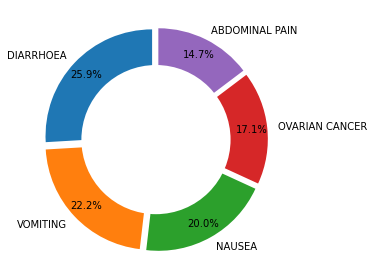

In [105]:

#This plots top 10 symptoms as a piechart
labels = []
sizes = []

top10=sorted(dic, key=dic.get, reverse=True)[:5]
print(top10)

for i in top10:
    labels.append(i)
    sizes.append(dic[i])
    #print(dic[i])

#fig1, ax1 = plt.subplots()
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.savefig("pieplot.png")


In [180]:


labels = []
sizes = []

top5=sorted(dic, key=dic.get, reverse=True)[:5]

for i in top5:
    labels.append(i)
    sizes.append(dic[i])

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.3)])

fig.update_layout(
    title_text="Top 5 symptoms distribution",
    template=None,
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='SYMP', x=0.18, y=0.5, font_size=20, showarrow=False)]
    )

fig.show()

In [69]:
data=pd.read_csv("../data/processed/clean_data.csv")
data["medra_preferred_terms"]=data["medra_preferred_terms"].str.split(",")
F_symp_vs_description=defaultdict(set)
M_symp_vs_description=defaultdict(set)
for i in range(data.shape[0]):
    #print(data["sex"])
    if type(data["sex"][i])!=float and data["sex"][i].strip()=="F":
        #print(type(data["medra_preferred_terms"][i]))
        if type(data["medra_preferred_terms"][i])==float:
            continue
        
        for j in range(len(data["medra_preferred_terms"][i])):
            if data["medra_preferred_terms"][i][j] == '' or pd.isnull(data["medra_preferred_terms"][i][j]) or type(data["description"][i])==float:
                continue
            descrip=data["description"][i].strip()
            symp=data["medra_preferred_terms"][i][j].strip()
            #if descrip not in symp_vs_product[symp]:
            F_symp_vs_description[symp].add(descrip)
    elif type(data["sex"][i])!=float and data["sex"][i].strip()=="M":
        #print(type(data["medra_preferred_terms"][i]))
        if type(data["medra_preferred_terms"][i])==float:
            continue
        
        for j in range(len(data["medra_preferred_terms"][i])):
            if data["medra_preferred_terms"][i][j] == '' or pd.isnull(data["medra_preferred_terms"][i][j]) or type(data["description"][i])==float:
                continue
            descrip=data["description"][i].strip()
            symp=data["medra_preferred_terms"][i][j].strip()
            #if descrip not in symp_vs_product[symp]:
            M_symp_vs_description[symp].add(descrip)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [108]:
data=pd.read_csv("../data/processed/clean_data.csv")
data["medra_preferred_terms"]=data["medra_preferred_terms"].str.split(",")
symp_vs_descrip=defaultdict(set)
descrip_count=defaultdict(int)
for i in range(data.shape[0]):
    #print(type(data["medra_preferred_terms"][i]))
    if type(data["medra_preferred_terms"][i])==float:
        continue
    
    for j in range(len(data["medra_preferred_terms"][i])):
        if data["medra_preferred_terms"][i][j] == '' or pd.isnull(data["medra_preferred_terms"][i][j]) or type(data["description"][i])==float:
            continue
        descrip=data["description"][i].strip()
        symp=data["medra_preferred_terms"][i][j].strip()
        #if descrip not in symp_vs_product[symp]:
        symp_vs_descrip[symp].add(descrip)
        if symp in top10:
            descrip_count[symp+"+"+descrip]+=1
#print(symp_vs_product)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [125]:
sorted_decriptions=sorted(descrip_count, key=descrip_count.get, reverse=True)
max_count=5
top_symp_top_descrip=defaultdict(list)
top_symp_top_descrip_count=defaultdict(list)
for i in sorted_decriptions:
    [pre,post]=i.split("+")
    if len(top_symp_top_descrip[pre])<max_count:
        top_symp_top_descrip[pre].append(post)
        top_symp_top_descrip_count[pre].append(descrip_count[i])
print(top_symp_top_descrip)
print(top_symp_top_descrip_count)

defaultdict(<class 'list'>, {'OVARIAN CANCER': ['Cosmetics', 'Vit/Min/Prot/Unconv Diet(Human/Animal)'], 'NAUSEA': ['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Fishery/Seafood Prod', 'Nuts/Edible Seed', 'Soft Drink/Water'], 'VOMITING': ['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Nuts/Edible Seed', 'Fruit/Fruit Prod', 'Bakery Prod/Dough/Mix/Icing'], 'DIARRHOEA': ['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Nuts/Edible Seed', 'Fishery/Seafood Prod', 'Fruit/Fruit Prod'], 'ABDOMINAL PAIN': ['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Nuts/Edible Seed', 'Fishery/Seafood Prod', 'Vegetables/Vegetable Products', 'Bakery Prod/Dough/Mix/Icing']})
defaultdict(<class 'list'>, {'OVARIAN CANCER': [11746, 80], 'NAUSEA': [5982, 913, 823, 781, 716], 'VOMITING': [5312, 1343, 1047, 879, 848], 'DIARRHOEA': [4975, 1755, 1563, 1372, 1016], 'ABDOMINAL PAIN': [2883, 1109, 825, 813, 654]})


In [171]:

for i in top_symp_top_descrip:
    des=top_symp_top_descrip[i]
    print(des)
    vals=top_symp_top_descrip_count[i]
    print(vals)
    zipped_list=zip(des,vals)
    df = pd.DataFrame(zipped_list, columns = ['Description', 'No. of instances'])
    #fig = px.histogram(df, x='Description', y='No. of instances',title=str(i))
    #fig.show()

['Cosmetics', 'Vit/Min/Prot/Unconv Diet(Human/Animal)']
[11746, 80]
['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Fishery/Seafood Prod', 'Nuts/Edible Seed', 'Soft Drink/Water']
[5982, 913, 823, 781, 716]
['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Nuts/Edible Seed', 'Fruit/Fruit Prod', 'Bakery Prod/Dough/Mix/Icing']
[5312, 1343, 1047, 879, 848]
['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Vegetables/Vegetable Products', 'Nuts/Edible Seed', 'Fishery/Seafood Prod', 'Fruit/Fruit Prod']
[4975, 1755, 1563, 1372, 1016]
['Vit/Min/Prot/Unconv Diet(Human/Animal)', 'Nuts/Edible Seed', 'Fishery/Seafood Prod', 'Vegetables/Vegetable Products', 'Bakery Prod/Dough/Mix/Icing']
[2883, 1109, 825, 813, 654]


In [141]:
import plotly.express as px
for i in top_symp_top_descrip:
    des=top_symp_top_descrip[i]
    vals=top_symp_top_descrip_count[i]
    zipped_list=zip(des,vals)
    df = pd.DataFrame(zipped_list, columns = ['Description', 'No. of instances'])
    fig = px.histogram(df, x='Description', y='No. of instances',title=str(i))
    fig.show()


In [206]:
from plotly.subplots import make_subplots
traces=[]
counter=0
colors=['red','violet','blue','yellow','purple']
for i in top_symp_top_descrip:
    des=top_symp_top_descrip[i]
    vals=top_symp_top_descrip_count[i]
    #zipped_list=zip(des,vals)
    #df = pd.DataFrame(zipped_list, columns = ['Description', 'No. of instances'])
    #fig = px.histogram(df, x='Description', y='No. of instances',title=str(i))

    df = pd.DataFrame(dict(r=vals,theta=des))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True,title=i)
    fig.update_traces(fill='toself')
    fig.update_layout( title_x=0.5)
    counter+=1
    #traces.append(fig)
    
    fig.show()
    #fig.write_image("images/fig"+str(counter)+".png")

# fig = make_subplots(rows=1, cols=5)
# fig.add_trace(traces[0], row=1, col=1)
# fig.add_trace(traces[1], row=1, col=2)
# fig.add_trace(traces[2], row=1, col=3)
# fig.add_trace(traces[3], row=1, col=4)
# fig.add_trace(traces[4], row=1, col=5)

#fig.update_layout(xaxis=dict(tickangle=90))
#fig.show()

In [89]:
top_symptoms_vs_descrip={}
for symptom in top10:
    top_symptoms_vs_descrip[symptom]=symp_vs_descrip[symptom]

print((top_symptoms_vs_descrip.values()))
##calculate top 5 symptoms and their top 5 descriptions

dict_values([{'Milk/Butter/Dried Milk Prod', 'Powder Formula', 'Formula, Form Unspecified', 'Soup', 'Baby Food Products', 'Vegetable Protein Prod', 'G Medical Foods, N.E.C.', 'Snack Food Item', 'Ready to Serve Formula', 'Gelatin/Rennet/Pudding Mix/Pie Filling', 'Miscellaneous Food Related Items', 'Ice Cream Prod', 'Dietary Conventional Foods/Meal Replacements', 'Cosmetics', 'Cheese/Cheese Prod', 'Meat, Meat Products and Poultry', 'Egg/Egg Prod', 'Food Additives (Human Use)', 'Cereal Prep/Breakfast Food', 'Prep Salad Prod', 'Mult Food Dinner/Grav/Sauce/Special', 'Soft Drink/Water', 'Medical Foods, N.E.C.', 'Fruit/Fruit Prod', 'Vegetables/Vegetable Products', 'Bakery Prod/Dough/Mix/Icing', 'Beverage Bases/Conc/Nectar', 'Vegetable Oils', 'Alcoholic Beverage', 'Food Sweeteners (Nutritive)', 'Choc/Cocoa Prod', 'Whole Grain/Milled Grain Prod/Starch', 'Nuts/Edible Seed', 'Macaroni/Noodle Prod', 'Spices, Flavors And Salts', 'Candy W/O Choc/Special/Chew Gum', 'Color Additiv Food/Drug/Cosmetic',

In [77]:
M_only_symp_vc_descr=defaultdict(set)
for key, values in M_symp_vs_description.items():
    for value in values:
        if key in F_symp_vs_description and value in F_symp_vs_description[key]:
            continue
       
        M_only_symp_vc_descr[key].add(value)

F_only_symp_vc_descr=defaultdict(set)
for key, values in F_symp_vs_description.items():
    for value in values:
        if key in M_symp_vs_description and value in M_symp_vs_description[key]:
            continue
       
        F_only_symp_vc_descr[key].add(value)

Top symptoms include ovarian cancer even though only females can get it. Mean there are products out there causing high probability of ovarian cancer

Formula causing vomiting for males but not females AND G medical cauing for females but not males

Only for males is alcohol causing a problem -> females dont drink as much or female anatomy not affected (unlikely reasn)


In [163]:
total_list=[]

for i in top5:
    val=[]
    if len(M_only_symp_vc_descr[i])>0:
        if len(F_only_symp_vc_descr[i])>0:
            val=[i,list(M_only_symp_vc_descr[i]), list(F_only_symp_vc_descr[i])]
        else:
            val=[i,list(M_only_symp_vc_descr[i]), ""]
    else:
        if len(F_only_symp_vc_descr[i])>0:
            val=[i,"", list(F_only_symp_vc_descr[i])]
        else:
            val=[i,"", ""]

    total_list.append(val)

df = pd.DataFrame(total_list, columns = ["Symptoms", "Unique_Description_for_Male", "Unique_Description_for_Female"])
rowEvenColor = 'lavender'
rowOddColor = 'pink'
fig = go.Figure(data=[go.Table(
    columnwidth = [80,100,330],
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Symptoms, df.Unique_Description_for_Male, df.Unique_Description_for_Female],
               fill_color=[[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
               align='left'))
])
fig.show()

In [ ]:
M_only_symp_vc_descr=defaultdict(set)
for key, values in M_symp_vs_description.items():
    for value in values:
        if key in F_symp_vs_description and value in F_symp_vs_description[key]:
            continue
       
        M_only_symp_vc_descr[key].add(value)

F_only_symp_vc_descr=defaultdict(set)
for key, values in F_symp_vs_description.items():
    for value in values:
        if key in M_symp_vs_description and value in M_symp_vs_description[key]:
            continue
       
        F_only_symp_vc_descr[key].add(value)

In [212]:
data=pd.read_csv("../data/processed/clean_data.csv")
grouped_desc=data.groupby("description")
grouped_desc_vit=grouped_desc.get_group('Vit/Min/Prot/Unconv Diet(Human/Animal)')
grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.split(",")
product_count_vs_symp_vit=defaultdict(int)
for indi_symp in top5:
    if type(data["medra_preferred_terms"][i])==float:
        continue

    
descrip_count=defaultdict(int)
for i in range(data.shape[0]):
    #print(type(data["medra_preferred_terms"][i]))
    if type(data["medra_preferred_terms"][i])==float:
        continue
    
    for j in range(len(data["medra_preferred_terms"][i])):
        if data["medra_preferred_terms"][i][j] == '' or pd.isnull(data["medra_preferred_terms"][i][j]) or type(data["description"][i])==float:
            continue
        descrip=data["description"][i].strip()
        symp=data["medra_preferred_terms"][i][j].strip()
        #if descrip not in symp_vs_product[symp]:
        symp_vs_descrip[symp].add(descrip)
        if symp in top10:
            descrip_count[symp+"+"+descrip]+=1

['DIARRHOEA', 'VOMITING', 'NAUSEA', 'OVARIAN CANCER', 'ABDOMINAL PAIN']


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.



In [270]:
data=pd.read_csv("../data/processed/clean_data.csv")
data["description"]=data["description"].str.strip()
grouped_desc=data.groupby("description")#.str.strip()
symptom_list=['DIARRHOEA', 'VOMITING', 'NAUSEA', 'ABDOMINAL PAIN']

grouped_desc_vit=grouped_desc.get_group("Cosmetics")
grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.split(",")

grouped_desc_vit= grouped_desc_vit.explode("medra_preferred_terms").drop_duplicates()
grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.strip()

grouped_desc_vit2=grouped_desc_vit.groupby("medra_preferred_terms")
grouped_desc_vit=grouped_desc_vit2.get_group('OVARIAN CANCER')
list_of_counts=grouped_desc_vit["product"].value_counts()
list_of_counts=list_of_counts.reset_index()
prods=list(list_of_counts["index"])[1:6]
quants=list(list_of_counts["product"])[1:6]
df = pd.DataFrame(dict(r=quants,theta=prods))
fig = px.line_polar(df, r='r', theta='theta', line_close=True,title='OVARIAN CANCER')
fig.update_traces(fill='toself')
fig.update_layout( title_x=0.5)

fig.show()

for symp in symptom_list:
    grouped_desc_vit=grouped_desc.get_group('Vit/Min/Prot/Unconv Diet(Human/Animal)')
    grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.split(",")

    grouped_desc_vit= grouped_desc_vit.explode("medra_preferred_terms").drop_duplicates()
    grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.strip()

    grouped_desc_vit2=grouped_desc_vit.groupby("medra_preferred_terms")
    grouped_desc_vit=grouped_desc_vit2.get_group(symp)
    list_of_counts=grouped_desc_vit["product"].value_counts()
    list_of_counts=list_of_counts.reset_index()
    prods=list(list_of_counts["index"])[1:6]
    quants=list(list_of_counts["product"])[1:6]
    df = pd.DataFrame(dict(r=quants,theta=prods))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True,title=symp)
    fig.update_traces(fill='toself')
    fig.update_layout( title_x=0.5)

    fig.show()

#print()
#print(sum(list_of_counts["product"]))


<ipython-input-270-6a9ae151257c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-270-6a9ae151257c>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [275]:
import plotly.graph_objects as go

fig = go.Figure()
symptom_list=['DIARRHOEA', 'VOMITING', 'NAUSEA', 'ABDOMINAL PAIN']

for symp in symptom_list:
    grouped_desc_vit=grouped_desc.get_group('Vit/Min/Prot/Unconv Diet(Human/Animal)')
    grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.split(",")

    grouped_desc_vit= grouped_desc_vit.explode("medra_preferred_terms").drop_duplicates()
    grouped_desc_vit["medra_preferred_terms"]=grouped_desc_vit["medra_preferred_terms"].str.strip()

    grouped_desc_vit2=grouped_desc_vit.groupby("medra_preferred_terms")
    grouped_desc_vit=grouped_desc_vit2.get_group(symp)
    list_of_counts=grouped_desc_vit["product"].value_counts()
    list_of_counts=list_of_counts.reset_index()
    prods=sorted(list(list_of_counts["index"])[1:6])
    quants=list(list_of_counts["product"])[1:6]
    zipped=zip(prods,quants)
    prods2=[]
    quants2=[]
    for p,q in zipped:
      prods2.append(p)
      quants2.append(q)
    
    
    #df = pd.DataFrame(dict(r=quants2,theta=prods2))

    fig.add_trace(go.Scatterpolar(
      r=quants2,
      theta=prods2,
      fill='toself',
      name=symp
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True,
  title="Top Vitamins vs Top Symptoms",
  title_x=0.5

)

fig.show()

<ipython-input-275-0e6f2cd08c34>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
259789 rows × 13 columns

In [215]:
grouped_desc_vit

,Unnamed: 0,report_id,caers_created_date,date_of_event,product_type,product,product_code,description,patient_age,age_units,sex,medra_preferred_terms,outcomes
0,0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"[BLOOD CALCIUM INCREASED, RENAL DISORDER]","Hospitalization, Patient Visited ER,"
1,1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"[DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAE...","Other Seriousness, Patient Visited ER,"
7,7,2018-CFS-000020,1/2/2018,10/27/2017,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),31.0,year(s),M,"[CONVULSION, ELECTROCARDIOGRAM ABNORMAL, DEP...","Hospitalization, Patient Visited Healthcare Pr..."
11,11,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Magnesium,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,[CARDIAC DISORDER],"Medically Important,"
12,12,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Vitamin D,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,[CARDIAC DISORDER],"Medically Important,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131256,50050,172888,12/31/2013,NaN,CONCOMITANT,FISH OIL (FISH OIL),54,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,year(s),F,"[DYSPHAGIA, CHOKING]",Medically Important
131257,50051,172888,12/31/2013,NaN,SUSPECT,"CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MUL...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),87.0,year(s),F,"[DYSPHAGIA, CHOKING]",Medically Important
131258,50052,172889,12/31/2013,NaN,SUSPECT,"CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MUL...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),86.0,year(s),F,[CHOKING],Medically Important
131259,50053,172891,12/31/2013,NaN,SUSPECT,"CENTRUM FLAVOR BURST(MUL TIMINERALS, MULTIVITA...",54,Vit/Min/Prot/Unconv Diet(Human/Animal),75.0,year(s),F,"[ROTATOR CUFF SYNDROME, POOR QUALITY DRUG ADM...",Medically Important


In [ ]:
data=pd.read_csv("../data/processed/clean_data.csv")
grouped_desc=data.groupby("description")
grouped_desc_vit=grouped_desc.get_group('Vit/Min/Prot/Unconv Diet(Human/Animal)')
#check ovarian cancer concomitant and susprct